# Libraries 
Libraries used in the following code are pandas, numpy, matplotlib, sklearn

In [1]:
import pandas as pd
import numpy as np
import time
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Data Read
Reading data from csv file named as "housing.csv"

In [2]:
data=pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plotting Data
Plotting each attribute/feature in the data set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1166a9240>,
      dtype=object)

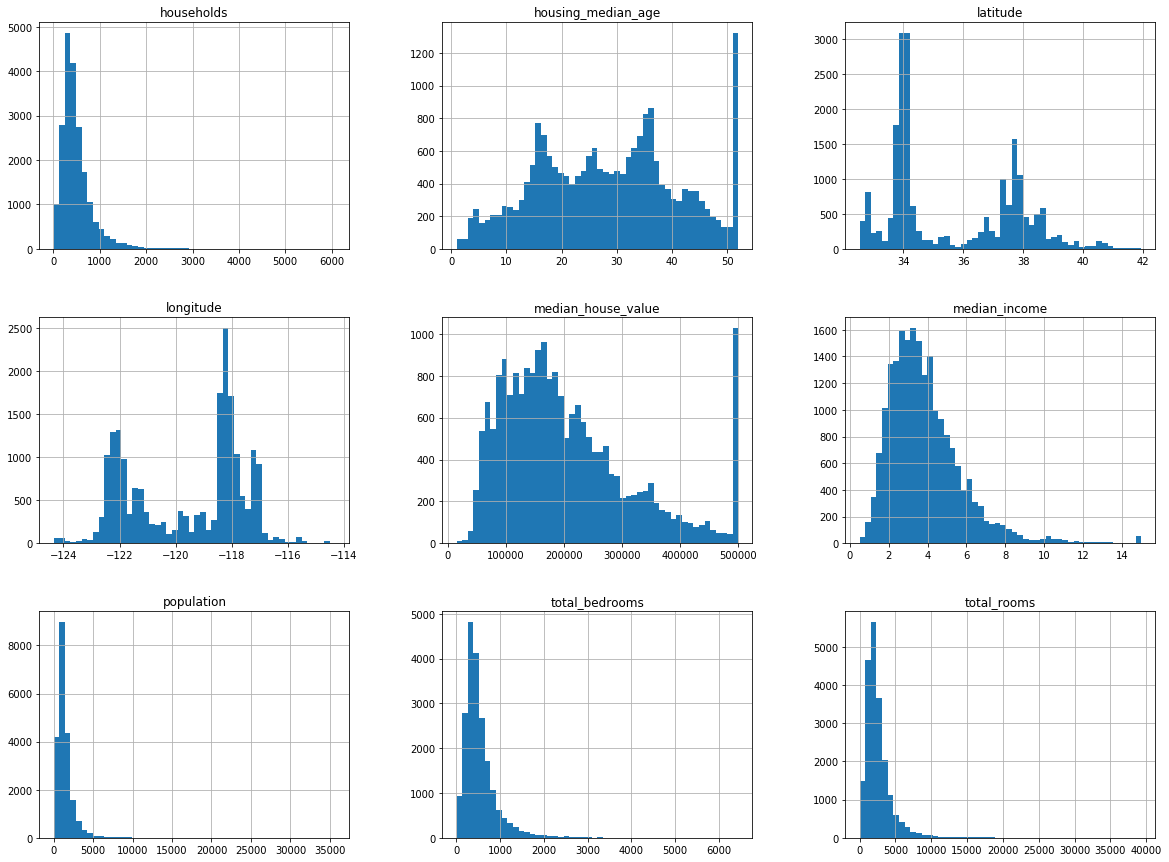

In [4]:
data.hist(bins=50,figsize=(20,15))

# Creating Training and Test Dataset
creating a training and test dataset using Scikit-Learn

In [5]:
train_set, test_set=train_test_split(data,test_size=0.2,random_state=12)

# Correlations of Data withrespect to median_house_value 
Correlations of data withrespect to median_house_value to be estimated


In [6]:
correlation_matrix=train_set.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685356
total_rooms           0.134831
housing_median_age    0.111649
households            0.066660
total_bedrooms        0.050123
population           -0.024226
longitude            -0.050038
latitude             -0.142114
Name: median_house_value, dtype: float64

# Attribute Combinations
Constructing new attributes using already existing attributes

In [7]:
train_set["rooms_per_household"] =train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"]=train_set["population"]/train_set["households"]

/Users/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [8]:
correlation_matrix=train_set.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685356
rooms_per_household         0.142614
total_rooms                 0.134831
housing_median_age          0.111649
households                  0.066660
total_bedrooms              0.050123
population_per_household   -0.021862
population                 -0.024226
longitude                  -0.050038
latitude                   -0.142114
bedrooms_per_room          -0.252368
Name: median_house_value, dtype: float64

# Preparing the Data
Here we will first remove the "median_house_value" entries from "train_set"

In [9]:
data_new = train_set.drop("median_house_value", axis=1)
data_labels = train_set["median_house_value"].copy()
train_labels = data_labels.copy()
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
1652,-121.97,37.93,4.0,3241.0,464.0,1552.0,494.0,6.6134,INLAND,6.560729,0.143166,3.141700
14652,-117.15,32.80,41.0,1413.0,261.0,1070.0,259.0,2.3578,NEAR OCEAN,5.455598,0.184713,4.131274
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,<1H OCEAN,5.716747,0.181555,2.689869
6730,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124,<1H OCEAN,6.623188,0.153902,2.785024
18445,-121.81,37.25,25.0,4096.0,623.0,2128.0,618.0,6.2957,<1H OCEAN,6.627832,0.152100,3.443366


In [10]:
data_test_new = test_set.drop("median_house_value", axis=1)
data_test_labels = test_set["median_house_value"].copy()
test_labels = data_test_labels.copy()
data_test_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6906,-118.13,34.04,42.0,2205.0,451.0,1392.0,423.0,4.3646,<1H OCEAN
767,-122.09,37.65,27.0,2630.0,722.0,1414.0,634.0,2.8203,NEAR BAY
10555,-117.71,33.63,16.0,2497.0,500.0,1357.0,456.0,4.5909,<1H OCEAN
17456,-120.43,34.69,33.0,2054.0,373.0,1067.0,358.0,3.6023,NEAR OCEAN
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,INLAND


In [11]:
data_labels.head()

1652     307000.0
14652    166700.0
3548     276600.0
6730     500001.0
18445    251800.0
Name: median_house_value, dtype: float64

In [12]:
sample_incomplete_rows = data_new[data_new.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
19391,-120.85,37.78,25.0,421.0,NaN,303.0,106.0,2.2679,INLAND,3.971698,NaN,2.858491
11351,-117.91,33.76,20.0,4413.0,NaN,4818.0,1063.0,2.8594,<1H OCEAN,4.151458,NaN,4.532455
9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,NEAR BAY,4.861111,NaN,3.125000
16038,-122.46,37.72,39.0,2254.0,NaN,1388.0,404.0,2.9688,NEAR OCEAN,5.579208,NaN,3.435644
13015,-121.19,38.71,11.0,4415.0,NaN,1520.0,627.0,3.2321,INLAND,7.041467,NaN,2.424242


In [13]:
sample_test_incomplete_rows = test_set[test_set.isnull().any(axis=1)].head()
sample_test_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7168,-118.17,34.06,43.0,464.0,NaN,416.0,120.0,2.4750,142600.0,<1H OCEAN
2412,-119.45,36.61,24.0,1302.0,NaN,693.0,243.0,3.7917,90500.0,INLAND
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,500001.0,NEAR OCEAN
14015,-117.17,32.75,52.0,1052.0,NaN,381.0,201.0,3.0726,289600.0,NEAR OCEAN
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,162100.0,<1H OCEAN


In [14]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # drop the row corresponding to "total_bedrooms" NaN
sample_test_incomplete_rows.dropna(subset=["total_bedrooms"]) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [15]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # drop the entire column "total_bedrooms"
sample_test_incomplete_rows.drop("total_bedrooms", axis=1) 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
7168,-118.17,34.06,43.0,464.0,416.0,120.0,2.4750,142600.0,<1H OCEAN
2412,-119.45,36.61,24.0,1302.0,693.0,243.0,3.7917,90500.0,INLAND
11512,-118.10,33.74,32.0,2035.0,934.0,512.0,4.2287,500001.0,NEAR OCEAN
14015,-117.17,32.75,52.0,1052.0,381.0,201.0,3.0726,289600.0,NEAR OCEAN
3376,-118.28,34.25,29.0,2559.0,1886.0,769.0,2.6036,162100.0,<1H OCEAN


# Filling missing Data
Filling missing data with median value

In [16]:
median = data_new["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
print(sample_incomplete_rows.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19391    -120.85     37.78                25.0        421.0           437.0   
11351    -117.91     33.76                20.0       4413.0           437.0   
9942     -122.23     38.17                45.0        350.0           437.0   
16038    -122.46     37.72                39.0       2254.0           437.0   
13015    -121.19     38.71                11.0       4415.0           437.0   

       population  households  median_income ocean_proximity  \
19391       303.0       106.0         2.2679          INLAND   
11351      4818.0      1063.0         2.8594       <1H OCEAN   
9942        225.0        72.0         1.8942        NEAR BAY   
16038      1388.0       404.0         2.9688      NEAR OCEAN   
13015      1520.0       627.0         3.2321          INLAND   

       rooms_per_household  bedrooms_per_room  population_per_household  
19391             3.971698                NaN                  2.8

In [17]:
test_median = data_test_new["total_bedrooms"].median()
sample_test_incomplete_rows["total_bedrooms"].fillna(test_median, inplace=True)
print(sample_test_incomplete_rows.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7168     -118.17     34.06                43.0        464.0           426.0   
2412     -119.45     36.61                24.0       1302.0           426.0   
11512    -118.10     33.74                32.0       2035.0           426.0   
14015    -117.17     32.75                52.0       1052.0           426.0   
3376     -118.28     34.25                29.0       2559.0           426.0   

       population  households  median_income  median_house_value  \
7168        416.0       120.0         2.4750            142600.0   
2412        693.0       243.0         3.7917             90500.0   
11512       934.0       512.0         4.2287            500001.0   
14015       381.0       201.0         3.0726            289600.0   
3376       1886.0       769.0         2.6036            162100.0   

      ocean_proximity  
7168        <1H OCEAN  
2412           INLAND  
11512      NEAR OCEAN  
14015      NEAR OCEA

In [18]:
imputer = Imputer(strategy="median")
data_num = data_new.drop('ocean_proximity', axis=1)
data_num["rooms_per_household"] =data_num["total_rooms"]/data_num["households"]
data_num["bedrooms_per_room"] = data_num["total_bedrooms"]/data_num["total_rooms"]
data_num["population_per_household"]=data_num["population"]/data_num["households"]
imputer.fit(data_num)
data_num.median().values

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.14200000e+03,
        4.37000000e+02,  1.17200000e+03,  4.11000000e+02,  3.52940000e+00,
        5.23325859e+00,  2.03193033e-01,  2.81846283e+00])

In [19]:
imputer_test = Imputer(strategy="median")
data_test_num = data_test_new.drop('ocean_proximity', axis=1)
data_test_num["rooms_per_household"] =data_test_num["total_rooms"]/data_test_num["households"]
data_test_num["bedrooms_per_room"] = data_test_num["total_bedrooms"]/data_test_num["total_rooms"]
data_test_num["population_per_household"]=data_test_num["population"]/data_test_num["households"]
imputer_test.fit(data_test_num)
data_test_num.median().values

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.07900000e+03,
        4.26000000e+02,  1.14650000e+03,  4.01000000e+02,  3.56540000e+00,
        5.22037085e+00,  2.03020895e-01,  2.81766331e+00])

In [20]:
X = imputer.transform(data_num)
housing_tr = pd.DataFrame(X, columns=data_num.columns, index = list(data_num.index.values))
# housing_tr=housing_tr.drop(['longitude','latitude','total_rooms','housing_median_age','households','total_bedrooms','population'],axis=1)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
1652,-121.97,37.93,4.0,3241.0,464.0,1552.0,494.0,6.6134,6.560729,0.143166,3.141700
14652,-117.15,32.80,41.0,1413.0,261.0,1070.0,259.0,2.3578,5.455598,0.184713,4.131274
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,5.716747,0.181555,2.689869
6730,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124,6.623188,0.153902,2.785024
18445,-121.81,37.25,25.0,4096.0,623.0,2128.0,618.0,6.2957,6.627832,0.152100,3.443366


In [21]:
X_test = imputer_test.transform(data_test_num)
housing_te = pd.DataFrame(X_test, columns=data_test_num.columns, index = list(data_test_num.index.values))
# housing_tr=housing_tr.drop(['longitude','latitude','total_rooms','housing_median_age','households','total_bedrooms','population'],axis=1)
housing_te.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
6906,-118.13,34.04,42.0,2205.0,451.0,1392.0,423.0,4.3646,5.212766,0.204535,3.290780
767,-122.09,37.65,27.0,2630.0,722.0,1414.0,634.0,2.8203,4.148265,0.274525,2.230284
10555,-117.71,33.63,16.0,2497.0,500.0,1357.0,456.0,4.5909,5.475877,0.200240,2.975877
17456,-120.43,34.69,33.0,2054.0,373.0,1067.0,358.0,3.6023,5.737430,0.181597,2.980447
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,4.921053,0.194296,2.701754


# Handling Text attributes
Here we will use one hot encoding to handle text attributes

In [22]:
housing_category = data_new['ocean_proximity']
housing_category.head(10)

1652         INLAND
14652    NEAR OCEAN
3548      <1H OCEAN
6730      <1H OCEAN
18445     <1H OCEAN
10052        INLAND
10536     <1H OCEAN
8976      <1H OCEAN
9999         INLAND
5218      <1H OCEAN
Name: ocean_proximity, dtype: object

In [23]:
housing_test_category = data_test_new['ocean_proximity']
housing_test_category.head(10)

6906      <1H OCEAN
767        NEAR BAY
10555     <1H OCEAN
17456    NEAR OCEAN
20617        INLAND
7729      <1H OCEAN
18345      NEAR BAY
19668        INLAND
11913        INLAND
7653      <1H OCEAN
Name: ocean_proximity, dtype: object

In [24]:
housing_category.value_counts()

<1H OCEAN     7299
INLAND        5259
NEAR OCEAN    2119
NEAR BAY      1830
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
housing_test_category.value_counts()

<1H OCEAN     1837
INLAND        1292
NEAR OCEAN     539
NEAR BAY       460
Name: ocean_proximity, dtype: int64

In [26]:
housing_category_encoded, housing_categories = housing_category.factorize()
housing_category_encoded[:10]

array([0, 1, 2, 2, 2, 0, 2, 2, 0, 2])

In [27]:
housing_test_category_encoded, housing_test_categories = housing_test_category.factorize()
housing_test_category_encoded[:10]

array([0, 1, 0, 2, 3, 0, 1, 3, 3, 0])

In [28]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [29]:
housing_test_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND'], dtype='object')

In [30]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_category_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
encoder_test = OneHotEncoder()
housing_test_cat_1hot = encoder_test.fit_transform(housing_test_category_encoded.reshape(-1,1))
housing_test_cat_1hot

<4128x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [32]:
encoder = ce.OneHotEncoder()
housing_cat_reshaped = housing_category.values.reshape(-1, 1)
encoder.fit(housing_cat_reshaped)
X_cleaned = encoder.transform(housing_cat_reshaped)
cat_data = X_cleaned.as_matrix()
print(X_cleaned[0:5])
print(type(cat_data))
print(cat_data.shape)

   0_0  0_1  0_2  0_3  0_4  0_-1
0    1    0    0    0    0     0
1    0    1    0    0    0     0
2    0    0    1    0    0     0
3    0    0    1    0    0     0
4    0    0    1    0    0     0
<class 'numpy.ndarray'>
(16512, 6)


In [33]:
encoder_test = ce.OneHotEncoder()
housing_test_cat_reshaped = housing_test_category.values.reshape(-1, 1)
encoder_test.fit(housing_test_cat_reshaped)
X_test_cleaned = encoder_test.transform(housing_test_cat_reshaped)
cat_test_data = X_test_cleaned.as_matrix()
print(X_test_cleaned[0:5])
print(type(cat_test_data))
print(cat_test_data.shape)

   0_0  0_1  0_2  0_3  0_-1
0    1    0    0    0     0
1    0    1    0    0     0
2    1    0    0    0     0
3    0    0    1    0     0
4    0    0    0    1     0
<class 'numpy.ndarray'>
(4128, 5)


# Scaling

In [34]:
scaler = StandardScaler()
scaler.fit(housing_tr)
housing_data = scaler.transform(housing_tr)
type(housing_data[:5])
housing_data[:5]
# housing_tr.head()

array([[-1.19783763,  1.0752015 , -1.95834565,  0.27745415, -0.17766033,
         0.11332624, -0.0175929 ,  1.46558398,  0.433847  , -1.20951528,
         0.00332191],
       [ 1.20763751, -1.32643521,  0.98342699, -0.56637048, -0.6614458 ,
        -0.32246216, -0.63212635, -0.7985996 ,  0.00826036, -0.49125556,
         0.08864809],
       [ 0.47900811, -0.64761002, -1.00425723,  2.61043537,  2.30561287,
         2.23892482,  2.48499653,  0.87910744,  0.10882892, -0.54585364,
        -0.03563733],
       [ 0.71356689, -0.71315176,  1.85800804,  0.04711033, -0.27775387,
        -0.24741976, -0.22679577,  2.26312397,  0.45790027, -1.02390574,
        -0.02743257],
       [-1.11798784,  0.75685589, -0.28869091,  0.67213142,  0.20126524,
         0.63410241,  0.30667157,  1.29655232,  0.45968841, -1.05506926,
         0.02933306]])

In [35]:
scaler_test = StandardScaler()
scaler.fit(housing_te)
housing_test_data = scaler.transform(housing_te)
type(housing_test_data[:5])
housing_test_data[:5]
# housing_tr.head()

array([[ 0.71877386, -0.74275286,  1.05629158, -0.18472499, -0.18880412,
        -0.02333557, -0.18795156,  0.22569089, -0.10263004, -0.1338598 ,
         0.3081956 ],
       [-1.25888561,  0.94786028, -0.13264128,  0.0048894 ,  0.45888556,
        -0.0054836 ,  0.36447727, -0.55505658, -0.66105714,  1.09185528,
        -0.62509508],
       [ 0.92852562, -0.93476156, -1.00452538, -0.05444875, -0.07169417,
        -0.05173643, -0.10155274,  0.34010076,  0.03539561, -0.20907492,
         0.03106497],
       [-0.42986674, -0.43834883,  0.34293186, -0.25209387, -0.37522403,
        -0.28705787, -0.35813105, -0.159703  ,  0.17260381, -0.53557361,
         0.03508657],
       [-0.9792166 ,  1.60818286, -0.68747662, -0.91819806, -1.00618371,
        -0.90295086, -0.9969587 , -0.31147429, -0.25566008, -0.31317795,
        -0.21017706]])

In [36]:
# full_data = np.append(housing_data, cat_data, axis = 1)
# full_test_data = np.append(housing_test_data, cat_data, axis = 1)

# print(full_data.shape)
# print(full_data.shape)

In [37]:
# train_data = full_data
# train_label = data_labels.as_matrix()
# print(train_data)
# print(train_label)

# Linear Regression - Closed Form

In [38]:
def normal_equation(x,y):
    z1 = np.dot(x.transpose(), x) 
    z = np.linalg.inv(z1)
    z2 = np.dot(z, x.transpose())
    theta = np.dot(z2, y)
    return theta

In [39]:
# np.insert(housing_data, 0, values=[1], axis=1)
# np.insert(housing_test_data, 0, values=[1], axis=1)
X = np.array(housing_data)
Y = np.array(train_labels).flatten()
X=np.insert(X, 0, values=1, axis=1)
# print(X.shape)
# print(Y.shape)

## Training time - Linear Regression (Closed form)

In [40]:
start_time = time.time()
theta=normal_equation(X, Y)
end_time = time.time()
training_time=end_time-start_time
print(training_time)

0.01106715202331543


In [41]:
print(theta)

[206122.00575339 -84222.60026029 -88758.88713304  14305.65885124
   6714.96891896    801.57854858 -50866.69379915  48281.99091644
  78678.20481076   7434.27559655  17751.85220122   1414.98842891]


In [42]:
# np.insert(housing_data, 0, values=[1], axis=1)
# np.insert(housing_test_data, 0, values=[1], axis=1)
X_test = np.array(housing_test_data)
Y_test = np.array(test_labels).flatten()
X_test=np.insert(X_test, 0, values=1, axis=1)
print(X_test.shape)
print(Y_test.shape)
theta_test=normal_equation(X_test, Y_test)

(4128, 12)
(4128,)


In [43]:
print(theta_test)

[209791.06153101 -81880.96636873 -87514.43100465  14566.95451174
  -2711.80331779   6251.99889184 -24985.8351771   26101.17101475
  84649.6850478   10599.60227529  21347.68441376 -13018.64620383]


In [44]:
# median = test_set["total_bedrooms"].median()
# data_num = test_set.drop(['ocean_proximity'], axis=1)
# data_num["total_bedrooms"].fillna(median, inplace=True) # option 3
# test_data = data_num.drop("median_house_value", axis=1) # drop labels for test set
# test_labels = data_num["median_house_value"].copy()
# # test_data['intercept']=1
# test_data.insert(0, 'intercept', value=1, allow_duplicates=True)
# test_data.head()

In [45]:
# scaler = StandardScaler()
# scaler.fit(test_data)
# test_data = scaler.transform(test_data)
# type(test_data[:5])
# test_data[:5]

In [46]:
# X = np.array(housing_data)
# X=np.insert(X, 0, values=1, axis=1)
# Y = np.array(train_labels)
# print(X.size)
# # print(X[5])
# # print(X[5].dot(theta))
# # print(Y[5])
# print(Y)
# print(X)

In [47]:
# X_test = np.array(housing_test_data)
# X_test=np.insert(X, 0, values=1, axis=1)
# Y = np.array(train_labels)
# print(X.size)
# # print(X[5])
# # print(X[5].dot(theta))
# # print(Y[5])
# print(Y)
# print(X)

## Checking Model Fitting - Linear Regression - Closed Form

In [48]:
predicted_labels=[]
for i in range(Y.size):
    predicted_labels.append(X[i].dot(theta))

In [49]:
predicted_test_labels=[]
for i in range(Y_test.size):
    predicted_test_labels.append(X_test[i].dot(theta_test))

## Mean Square Error - Linear Regression - Closed Form

In [50]:
mean_squared_error(train_labels, predicted_labels)

4670950151.461435

In [51]:
mean_squared_error(test_labels, predicted_test_labels)

4664049324.33277

# Linear Regression- Gradient Desent

In [52]:
# X_data=np.copy(X)
# X_data=np.insert(X_data, 0, values=[1], axis=1)

In [53]:
def gradient_descent_linear_regression(X_data,Y,learning_rate,number_iterations):
    theta=np.zeros(X_data.shape[1])
    for i in range(number_iterations):
        z=np.dot(X_data,theta)
        gradient=np.dot(X_data.T, (z - Y)) / Y.size
        theta=theta-learning_rate*gradient
    return theta

## Training Time - Linear Regression (Newton's Method)

In [54]:
# print(X_data.shape)
learning_rate=0.1
number_iterations=30000
start_time = time.time()
theta=gradient_descent_linear_regression(X,Y,learning_rate,number_iterations)
end_time = time.time()
training_time=end_time-start_time
print(training_time)
# print(theta)

7.398868083953857


In [55]:
# print(X_data.shape)
# learning_rate=0.1
# number_iterations=300000
# theta_test=gradient_descent_linear_regression(X_test,Y_test,learning_rate,number_iterations)
# print(theta_test)

In [56]:
# train_data_new=np.copy(train_data)
# train_data_new=np.insert(train_data_new, 0, values=[1], axis=1);
predicted_labels=[]
for i in range(len(Y)):
        predicted_labels.append(X[i].dot(theta))
# print(predicted_labels)

In [57]:
# train_data_new=np.copy(train_data)
# train_data_new=np.insert(train_data_new, 0, values=[1], axis=1);
predicted_test_labels=[]
for i in range(len(Y_test)):
        predicted_test_labels.append(X_test[i].dot(theta))
# print(predicted_labels)

## Mean Square Error - Linear Regression (Gradient Desent)

In [58]:
mean_squared_error(train_labels,predicted_labels)

4670950151.461435

In [59]:
mean_squared_error(test_labels,predicted_test_labels)

4871150664.4090395

# Linear Regression - Newton's method

In [60]:
def newton_method_linear_regression(X_data,Y,number_iterations):
    theta=np.zeros(X_data.shape[1])
    for i in range(number_iterations):
        z=np.dot(X_data,theta)
        gradient=np.dot(X_data.T, (z - Y)) / Y.size
        learning_rate=np.linalg.inv(np.dot(X_data.T,X_data)/ Y.size)
#         print(theta)
#         print(gradient)
        theta=theta-np.dot(learning_rate,gradient)
    return theta


## Training Time - Linear Regression (Newton's Method)

In [61]:
start_time = time.time()
theta=newton_method_linear_regression(X,Y,number_iterations)
end_time = time.time()
training_time=end_time-start_time
print(training_time)
# print(theta)

14.197120904922485


In [62]:
# theta_test=newton_method_linear_regression(X_test,Y_test,number_iterations)
# print(theta_test)

In [63]:
predicted_labels=[]
for i in range(len(Y)):
    predicted_labels.append(X[i].dot(theta))
  

In [64]:
predicted_test_labels=[]
for i in range(len(Y_test)):
    predicted_test_labels.append(X_test[i].dot(theta))
  

## Mean Square Error - Linear Regression (Newton's method)

In [65]:
mean_squared_error(train_labels,predicted_labels)

4670950151.461435

In [66]:
mean_squared_error(test_labels,predicted_test_labels)

4871150664.4090395

# Ridge Regression 

In [67]:
def ridge_regression(x,y,regularisation_parameter):
    z1 = np.dot(x.transpose(), x)
#     identity_matrix=np.identity_matrix(x.shape[1])
    a = np.zeros((x.shape[1], x.shape[1]))
    np.fill_diagonal(a, regularisation_parameter)
    s=np.add(z1, a)
    print(a)
    z = np.linalg.inv(s)
    z2 = np.dot(z, x.transpose())
    theta = np.dot(z2, y)
    return theta

## Training Time - Ridge Regression 

In [68]:
start_time = time.time()
theta=ridge_regression(X, Y,1)
end_time = time.time()
training_time=end_time-start_time
print(training_time)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
0.006833076477050781


In [69]:
# np.insert(housing_data, 0, values=[1], axis=1)
# X = np.array(housing_data)
# Y = np.array(train_label).flatten()
# #Y = train_label.copy
# #Y=Y.flatten()
# X=np.insert(X, 0, values=1, axis=1)
# print(X_test.shape)
# print(Y_test.shape)
# theta=ridge_regression(X_test, Y_test,1)
# print(theta_test)

In [70]:
# X = np.array(housing_data)
# X=np.insert(X, 0, values=1, axis=1)
# Y = np.array(train_labels)

In [71]:
predicted_labels=[]
for i in range(Y.size):
    predicted_labels.append(X[i].dot(theta))

In [72]:
predicted_test_labels=[]
for i in range(Y_test.size):
    predicted_test_labels.append(X_test[i].dot(theta))

## Mean Square Error  - Ridge Regression

In [73]:
mean_squared_error(train_labels, predicted_labels)

4670951513.352203

In [74]:
mean_squared_error(test_labels, predicted_test_labels)

4871025440.367849

# Lasso Regression

## Training Time - Lasso Regression

2.2221641540527344


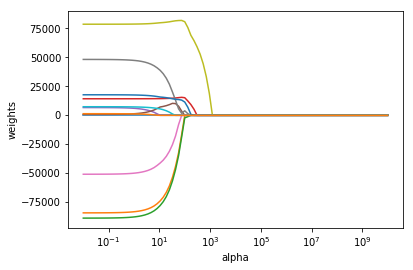

In [75]:
# Lasso Regression

alphas = 10**np.linspace(10,-2,100)*0.5
start_time = time.time()
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, Y)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, Y)
end_time = time.time()
training_time=end_time-start_time
print(training_time)



## Mean Square Error - Lasso Regression

In [76]:
mean_squared_error(Y, lasso.predict(X))

4672855821.271355

In [77]:
mean_squared_error(Y_test, lasso.predict(X_test))

4858107786.00383